# Итоговый проект теллекоммуникации

**Описание проекта**

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Наша задача — обучить на этих данных модель для прогноза оттока клиентов.

**Описание услуг**
    
    Оператор предоставляет два основных типа услуг: 
* 		Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.


* 		Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

    Также доступны такие услуги:
* 		Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
* 		Выделенная линия технической поддержки (TechSupport);
* 		Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
* 		Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

**Описание данных:**
Данные состоят из нескольких файлов, полученных из разных источников:
* 		contract_new.csv — информация о договоре;
* 		personal_new.csv — персональные данные клиента;
* 		internet_new.csv — информация об интернет-услугах;
* 		phone_new.csv — информация об услугах телефонии.

**Файл contract_new.csv**

* 		customerID — идентификатор абонента;
* 		BeginDate — дата начала действия договора;
* 		EndDate — дата окончания действия договора;
* 		Type — тип оплаты: раз в год-два или ежемесячно;
* 		PaperlessBilling — электронный расчётный лист;
* 		PaymentMethod — тип платежа;
* 		MonthlyCharges — расходы за месяц;
* 		TotalCharges — общие расходы абонента.

**Файл personal_new.csv**

* 		customerID — идентификатор пользователя;
* 		gender — пол;
* 		SeniorCitizen — является ли абонент пенсионером;
* 		Partner — есть ли у абонента супруг или супруга;
* 		Dependents — есть ли у абонента дети.

**Файл internet_new.csv**

* 		customerID — идентификатор пользователя;
* 		InternetService — тип подключения;
* 		OnlineSecurity — блокировка опасных сайтов;
* 		OnlineBackup — облачное хранилище файлов для резервного копирования данных;
* 		DeviceProtection — антивирус;
* 		TechSupport — выделенная линия технической поддержки;
* 		StreamingTV — стриминговое телевидение;
* 		StreamingMovies — каталог фильмов.

**Файл phone_new.csv**

* 		customerID — идентификатор пользователя;
* 		MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

**Цель проекта:**
* Разработать модель машинного обучения, которая сможет прогнозировать вероятность оттока клиентов оператора связи «ТелеДом» на основе их персональных данных, информации о тарифах и услугах.

**План выполнения проекта**

* Первичный осмотр данных
* Выполним первичную обработку данных
* Создадим итоговую таблицу, объединив данные
* Проанализируем распределение признаков
* Исследуем корреляцию
* Оценим дисбаланс классов
* Отберем признаки
* Закодируем признаки
* Подберем гиперпараметры 
* Исследуем модели
* Выберем и оценим лучшую модель
* Анализ и интерпретация важности признаков
* Анализ и интерпретация матрицы ошибок
* Итоговый вывод, рекомендации для бизнеса

**Импортируем необходимые библиотеки и установим константы**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
!pip install -U scikit-learn
import phik
from phik import phik_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_predict
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
import torch
RANDOM_STATE = 2062025

## **Загрузим и выполним первичный осмотр данных**

**Загрузим наши данные**

In [2]:
try:
    contract_df = pd.read_csv('/datasets/contract_new.csv')
    personal_df = pd.read_csv('/datasets/personal_new.csv')
    internet_df = pd.read_csv('/datasets/internet_new.csv')
    phone_df = pd.read_csv('/datasets/phone_new.csv')
except:
    contract_df = pd.read_csv('/contract_new.csv')
    personal_df = pd.read_csv('/personal_new.csv')
    internet_df = pd.read_csv('/internet_new.csv')
    phone_df = pd.read_csv('/phone_new.csv')

Напишем функцию, которая позволит просмотреть первичную информацию о данных:contract_df = pd.read_csv('/datasets/contract_new.csv')
    personal_df = pd.read_csv('/datasets/personal_new.csv')
    internet_df = pd.read_csv('/datasets/internet_new.csv')
    phone_df = pd.read_csv('/datasets/phone_new.csv')

In [3]:
def info_df(df):
    display(df.head())
    print("Общая информация"),
    display(df.info())
    display(df.describe().T),
    print('Количество пропусков')
    display((df.isna().mean() * 100).sort_values(ascending=False)),
    print('Количество явных дубликатов')
    display(df.duplicated().sum())
    print('Размерность'),
    display(df.shape)

Теперь просмотрим данные:

**Датафрейм contract_df**

In [4]:
info_df(contract_df)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Количество пропусков


customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64

Количество явных дубликатов


0

Размерность


(7043, 8)

**Датафрейм personal**

In [5]:
info_df(personal_df)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0


Количество пропусков


customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64

Количество явных дубликатов


0

Размерность


(7043, 5)

**Датафрейм internet**

In [6]:
info_df(internet_df)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,count,unique,top,freq
customerID,5517,5517,8559-CIZFV,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


Количество пропусков


customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

Количество явных дубликатов


0

Размерность


(5517, 8)

**Датафрейм phone**

In [7]:
info_df(phone_df)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,count,unique,top,freq
customerID,6361,6361,9019-QVLZD,1
MultipleLines,6361,2,No,3390


Количество пропусков


customerID       0.0
MultipleLines    0.0
dtype: float64

Количество явных дубликатов


0

Размерность


(6361, 2)

### Общий вывод по данным 

* **Датафрейм contract**
    * Датафрейм состоит из 7043 строк и 8 столбцов 
    * Пропуски в данных отсутствуют
    * Явные дубликаты в данных отсутствуют
    * Столбцы BeginDate и EndDate стоит перевести в формат даты
    * Столбец EndDate, имеет значения No, данное значение является признаком того, что клиент продолжает пользоваться услугами, в условии задачи при этом отмечено, что Информация о договорах актуальна на 1 февраля 2020 года, поэтому после выделения целевого признака надо будет заменить No на 01.02.2020 в EndDate
    * Столбец customerID необходимо переименовать на CustomerID
    * В столбец TotalCharges значения необходимо перевести в числовой формат
    
* **Датафрейм personal**
    * Состоит из 7043 строк и 5 столбцов
    * Пропуски в данных отсутствуют 
    * Явные дубликаты отсутствуют
    * Типы данных соответствуют
    * Стоит поменять название столбцов customerID -> CustomerID, gender -> Gender
    
* **Датафрейм internet**
    * Состоит из 5517 строк и 8 столбцов 
    * Пропуски в данных отсутствуют 
    * Явные дубликаты отсутствуют
    * Типы данных соответствуют
    * Стоит поменять название столбца customerID -> CustomerID
    
* **Датафрейм phone**
    * Состоит из 6361 строк и 2 столбцов 
    * Пропуски отсутствуют
    * Явные дубликаты отсутствуют
    * Типы данных соответсвуют
    * Столбец customerID стоит преобразовать в СustomerID

Перед первичной обработкой данных стоит также отметить, что в датафреймах internet и phone меньше строк, чем в датафрейме contract

## **Предобработка данных**

### Изменим названия столбцов

In [8]:
contract_df.rename(columns={
    "customerID":"CustomerID"
},inplace=True)
personal_df.rename(columns={
    "customerID":"CustomerID",
    "gender":"Gender"
},inplace=True)
internet_df.rename(columns={
    "customerID":"CustomerID"
},inplace=True)
phone_df.rename(columns={
    "customerID":"CustomerID"
},inplace=True)
#Просмотрим на новые столбцы во всех датафреймах
display(contract_df.head(1))
display(personal_df.head(1))
display(internet_df.head(1))
display(phone_df.head(1))

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04


,CustomerID,Gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No


,CustomerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No


,CustomerID,MultipleLines
0,5575-GNVDE,No


Для дальнейшей предобработки данных стоит ввести новый целевой признак,обозначим его refusal_service - то есть отказался наш клиент от услуги или нет. **Столбец будет принимать соответствующие значения,если значение в столбце EndDate равно "No", то значит клиент не ушел и целевой признак равен 0
Если дата ухода есть, то целевой признак равен 1**

In [9]:
contract_df['refusal_service'] = (contract_df['EndDate'] != 'No').astype(int)
contract_df.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,refusal_service
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,0


### Изменим тип данных столбцов

Перед тем как изменить типы стоит также, поменять значения No в столбце EndDate на дату акутальности то есть  на 1 февраля 2020 года

In [10]:
contract_df['EndDate'] = contract_df['EndDate'].replace(['No'],['2020-02-01'])
contract_df['EndDate']

0       2020-02-01
1       2020-02-01
2       2020-02-01
3       2020-02-01
4       2020-02-01
           ...    
7038    2020-02-01
7039    2020-02-01
7040    2020-02-01
7041    2020-02-01
7042    2020-02-01
Name: EndDate, Length: 7043, dtype: object

Теперь приступим к изменению типу данных для датафрейма contract_df

In [11]:
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'],format='%Y-%m-%d')
contract_df['EndDate'] = pd.to_datetime(contract_df['EndDate'],format = '%Y-%m-%d')
contract_df['TotalCharges'] = pd.to_numeric(contract_df['TotalCharges'],errors ='coerce')

Стоит также сказать, что в будущем нам будет необходимо удалить столбцы BeginDate и EndDate для корректной работы модели, при этом мы можем потерять довольно значимый признак, поэтому добавим новый признак SumDays,который будет подсчитывать общее количество дней, которое пользователь провел будучи клиентом

In [12]:
contract_df['SumDays'] = (contract_df['EndDate'] - contract_df['BeginDate']).dt.days

Просмотрим типы данных

In [13]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   refusal_service   7043 non-null   int64         
 9   SumDays           7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB


Проверим строки на пропуски

In [14]:
display(contract_df['TotalCharges'].isna().sum())
display(contract_df['BeginDate'].isna().sum())
display(contract_df['EndDate'].isna().sum())

11

0

0

Теперь в таблице contract в столбце TotalCharges появились пропуски, просмотрим полные строки с пропусками

In [15]:
contract_df[contract_df['TotalCharges'].isna()]

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,refusal_service,SumDays
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,0,0


Как можно увидеть, данные пропуски связаны с тем, что клиенты пользуются услугами 1 день, поэтому стоит заменить пропуски в TotalCharges на 0

In [16]:
contract_df['TotalCharges'].fillna(0,inplace=True)
contract_df['TotalCharges'].isna().sum()

0

### Создание итоговой таблицы

Объединим все таблицы по CustomerID и установим CustomerID в качестве индекса.

In [17]:
res_df = (
    contract_df
    .merge(personal_df, how='left', on='CustomerID')
    .merge(internet_df, how='left', on='CustomerID')
    .merge(phone_df, how='left', on='CustomerID')
)
res_df = res_df.set_index('CustomerID')

Просмотрим теперь информацию по итоговой таблице

In [18]:
info_df(res_df)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,refusal_service,SumDays,Gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,1036,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


Общая информация
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   refusal_service   7043 non-null   int64         
 8   SumDays           7043 non-null   int64         
 9   Gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   5517 non-null   object        
 1

None

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2115.312885,2112.742814,0.00,436.75,1343.35,3236.69,9221.38
refusal_service,7043.0,0.156325,0.363189,0.00,0.00,0.00,0.00,1.00
SumDays,7043.0,898.555729,683.130510,0.00,276.00,761.00,1461.00,2314.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00


Количество пропусков


StreamingMovies     21.666903
StreamingTV         21.666903
TechSupport         21.666903
DeviceProtection    21.666903
OnlineBackup        21.666903
OnlineSecurity      21.666903
InternetService     21.666903
MultipleLines        9.683374
Partner              0.000000
Dependents           0.000000
BeginDate            0.000000
EndDate              0.000000
Gender               0.000000
SumDays              0.000000
refusal_service      0.000000
TotalCharges         0.000000
MonthlyCharges       0.000000
PaymentMethod        0.000000
PaperlessBilling     0.000000
Type                 0.000000
SeniorCitizen        0.000000
dtype: float64

Количество явных дубликатов


4

Размерность


(7043, 21)

Видим что наша итоговая таблица имеет пропуски в столбцах с услугами, они появились так как клиент скорее всего не подключал услугу,если просто заменить пропуски на 'No', это будет означать, что:
* Клиент подключил основную услугу (телефонию или интернет), но не подключил дополнительные.
* Но на самом деле пропуски означают, что клиент вообще не пользовался основной услугой (нет записи в phone_df или internet_df).

In [19]:
# Для интернет-услуг
internet_columns = [
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
res_df[internet_columns] = res_df[internet_columns].fillna('NotSubscribed')

# Для телефонии
res_df['MultipleLines'] = res_df['MultipleLines'].fillna('NotSubscribed')

Проверим пропуски:

In [20]:
res_df.isna().sum()

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
refusal_service     0
SumDays             0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

### Вывод по предобработке данных

В ходе предобработки данных были выполнены следующие шаги:
* Изменены названия столбцов: customerID -> CustomerID,gender->Gender
* Создан целевой признак - refusal_service
* Изменены типы данных для таблицы contract: BeginDate -> date,EndDate -> date
* Создали итоговую таблицу для последующего анализа данных

Данные готовы, можно приступать к анализу

## **Анализ данных**

Перед просмотром распределений данных, стоит разделить категориальные и количественные признаки:
Так, категориальные признаки: Type,PaperlessBilling,PaymentMethod,Gender,SeniorCitizen',PartnerDependents, InternetService, OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV, StreamingMovies, MultipleLines

А количественные:
MonthlyCharges, TotalCharges, TotalDays

In [21]:
kol_col = ['MonthlyCharges', 'TotalCharges','SumDays']
cat_col = ['Type','PaperlessBilling','PaymentMethod','Gender','SeniorCitizen','Partner','Dependents','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines',
]

Напишем функцию, для построения графиков

In [22]:
def plot_features_cat(df, features):
    sns.set(style="whitegrid")
    plt.rcParams['figure.facecolor'] = 'white'
    # Рассчитываем размер сетки графиков
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 8*n_rows))
    axes = axes.flatten()
    # Построение графиков для каждого признака
    for i, feature in enumerate(features):
        sns.countplot(x=df[feature], ax=axes[i], palette="viridis")    
        axes[i].set_title(f'Распределение {feature}',pad=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Количество')  
    # Скрываем пустые оси
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.suptitle('Распределение категориальных признаков', fontsize=16)
    plt.show()

### Просмотрим распределение категориальных признаков

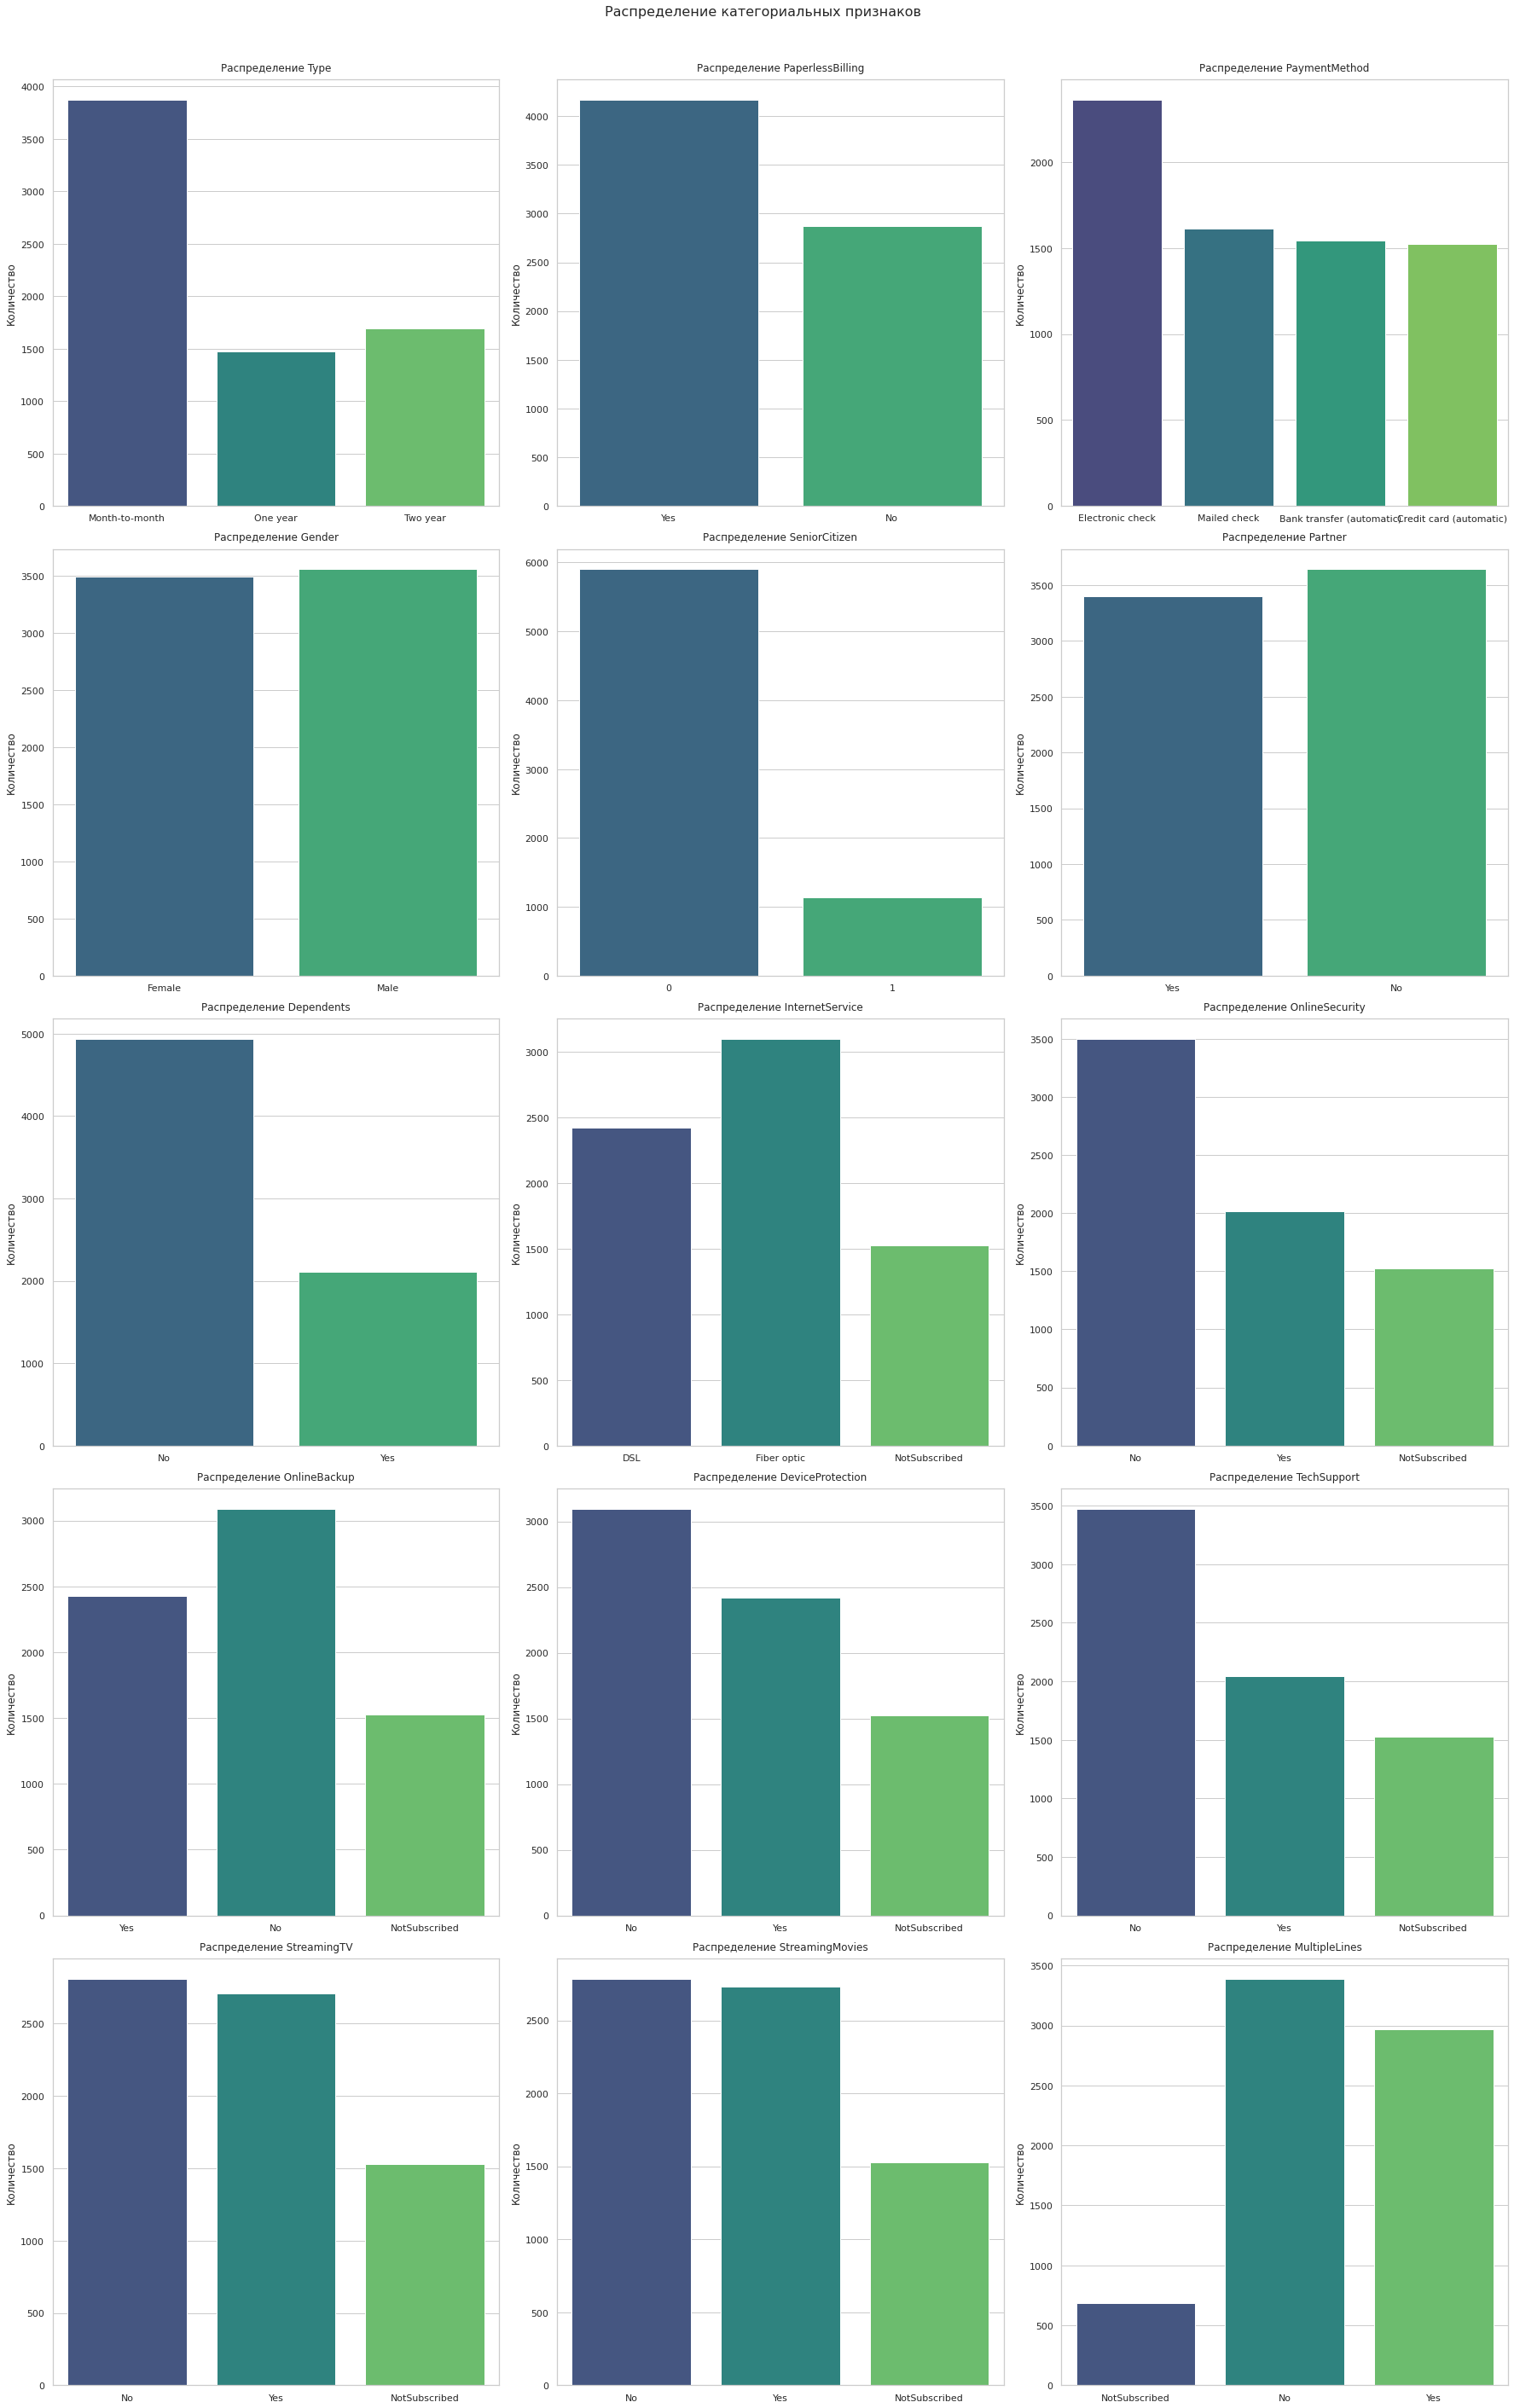

In [23]:
plot_features_cat(res_df,cat_col)

**Итого:**
* О клиентах
    * Большинство клиентов пользуются помесячной оплатой
    * Большинство получают электронный рассчет
    * Большинство оплачивают услуги с помощью электронного чека
    * Больше всего клиентов мужского пола
    * Клиентов пенсионеров - меньшинство
    * Клиентов у которых отсутствует супруг/супруга больше
    * Множество клиентов не имеют детей
* Услуги
    * Самая популярная услугу среди интернета - опто-волоконное подключение
    * Дополнительные услуги, такие как: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines не пользуются популярностью у абонентов

### Рассмотрим распределение колличественных признаков

Напишем функцию

In [24]:
def plot_features_num(df, features):
    # Настройки стиля
    sns.set(style="whitegrid")
    plt.rcParams['figure.facecolor'] = 'white'
    #Создаем фигуру 3x2 
    fig, axes = plt.subplots(3, 2, figsize=(20, 15))
    # Цвета для каждого признака
    colors = ['royalblue', 'coral', 'pink']
    # Строим графики для каждого из 3 признаков
    for i, (feature, color) in enumerate(zip(features, colors)):
        
        # Гистограмма
        sns.histplot(df[feature], ax=axes[i, 0], kde=True, 
                    color=color, bins=20)
        axes[i, 0].set_title(f'Гистограмма: {feature}', pad=10)
        axes[i, 0].set_xlabel('')
        axes[i, 0].set_ylabel('Частота', labelpad=10)
        
        # Boxplot
        sns.boxplot(x=df[feature], ax=axes[i, 1], color=color)
        axes[i, 1].set_title(f'Boxplot: {feature}', pad=10)
        axes[i, 1].set_xlabel('')
    # Общее оформление
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.3)
    plt.suptitle('Анализ распределения признаков', y=0.98, fontsize=14)
    plt.show()

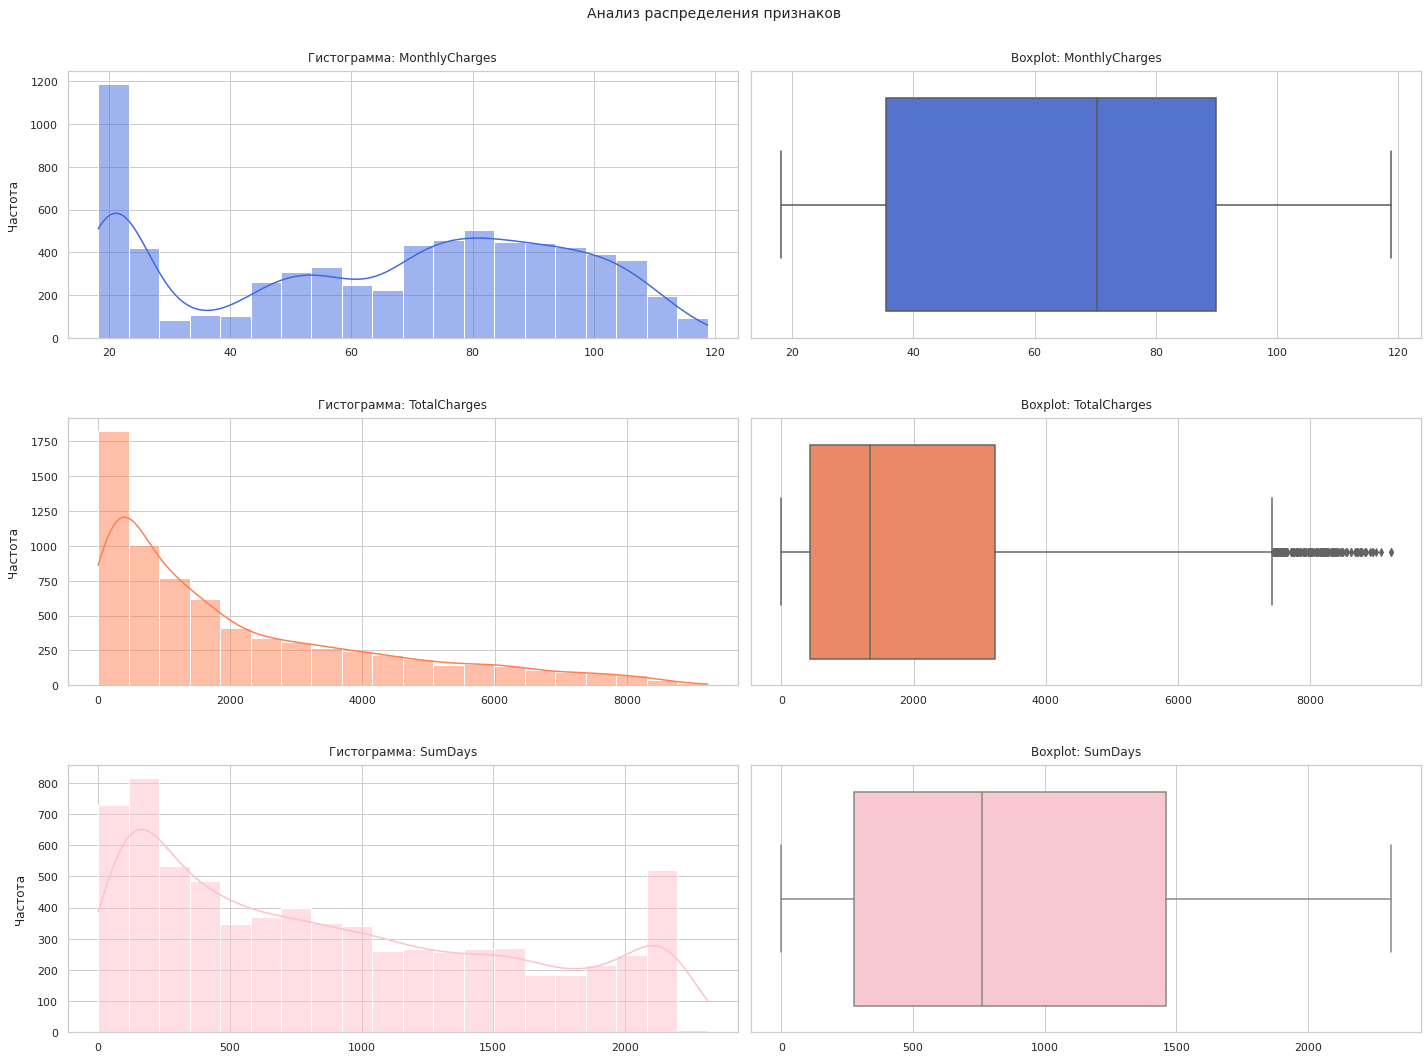

In [25]:
plot_features_num(res_df,kol_col)

Теперь просмотрим на распределение данных

In [26]:
res_df[kol_col].describe()

,MonthlyCharges,TotalCharges,SumDays
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.312885,898.555729
std,30.090047,2112.742814,683.130510
min,18.250000,0.000000,0.000000
25%,35.500000,436.750000,276.000000
50%,70.350000,1343.350000,761.000000
75%,89.850000,3236.690000,1461.000000
max,118.750000,9221.380000,2314.000000


Итого:
* Значения в столбце TotalCharges убывают, в то же время в столбце MonthlyCharges виден пик в райне 85 - это значит, что пользователи, которые платят за тариф много на долго не остаются, а также пик в значении 20, что говорит нам о бимодальности данных, скорее всего это связано с распределением бедный или богатый клиент, об этом также может говорить выброс в значениях >7000 TotalCharges, стоит рассмотреть распределение данных в зависимости от нашего целевого признака

### Рассмотрим распределение данных в зависимости от целевого признака

Категориальные признаки

Целевой признак = 1, клиент отказался от услуг


None

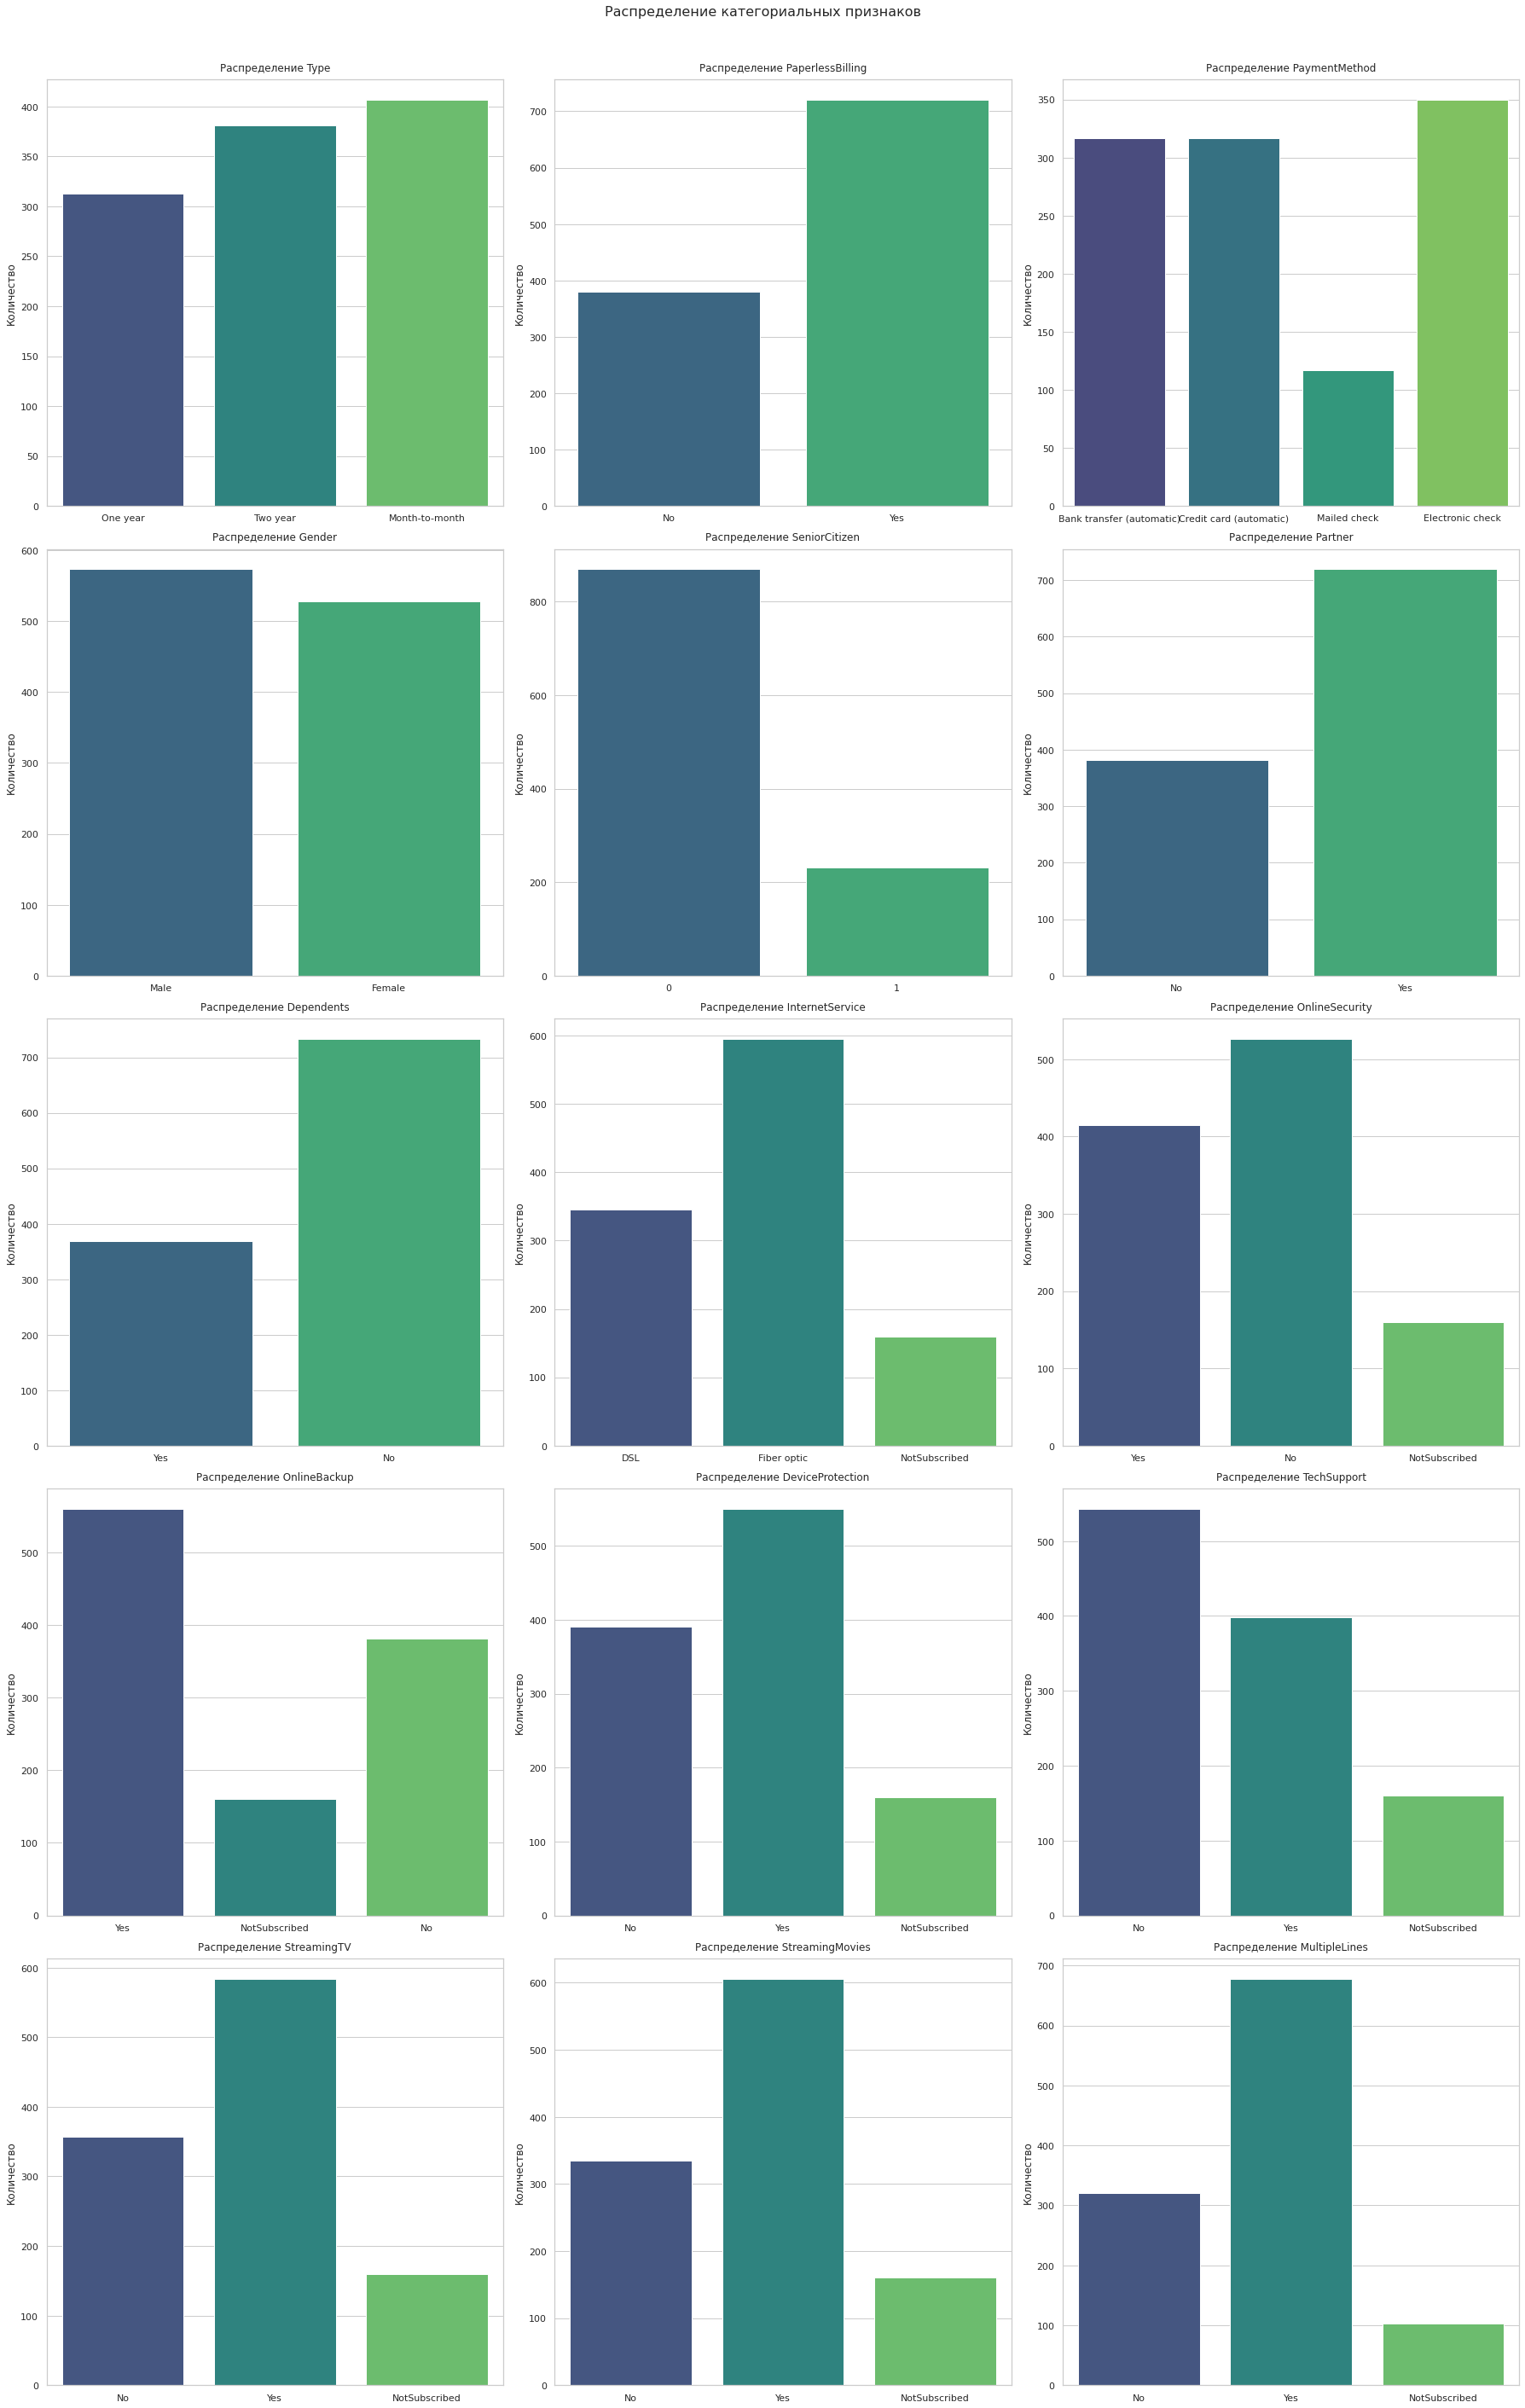

None

Целевой признак = 0, клиент продолжает пользоваться услугами


None

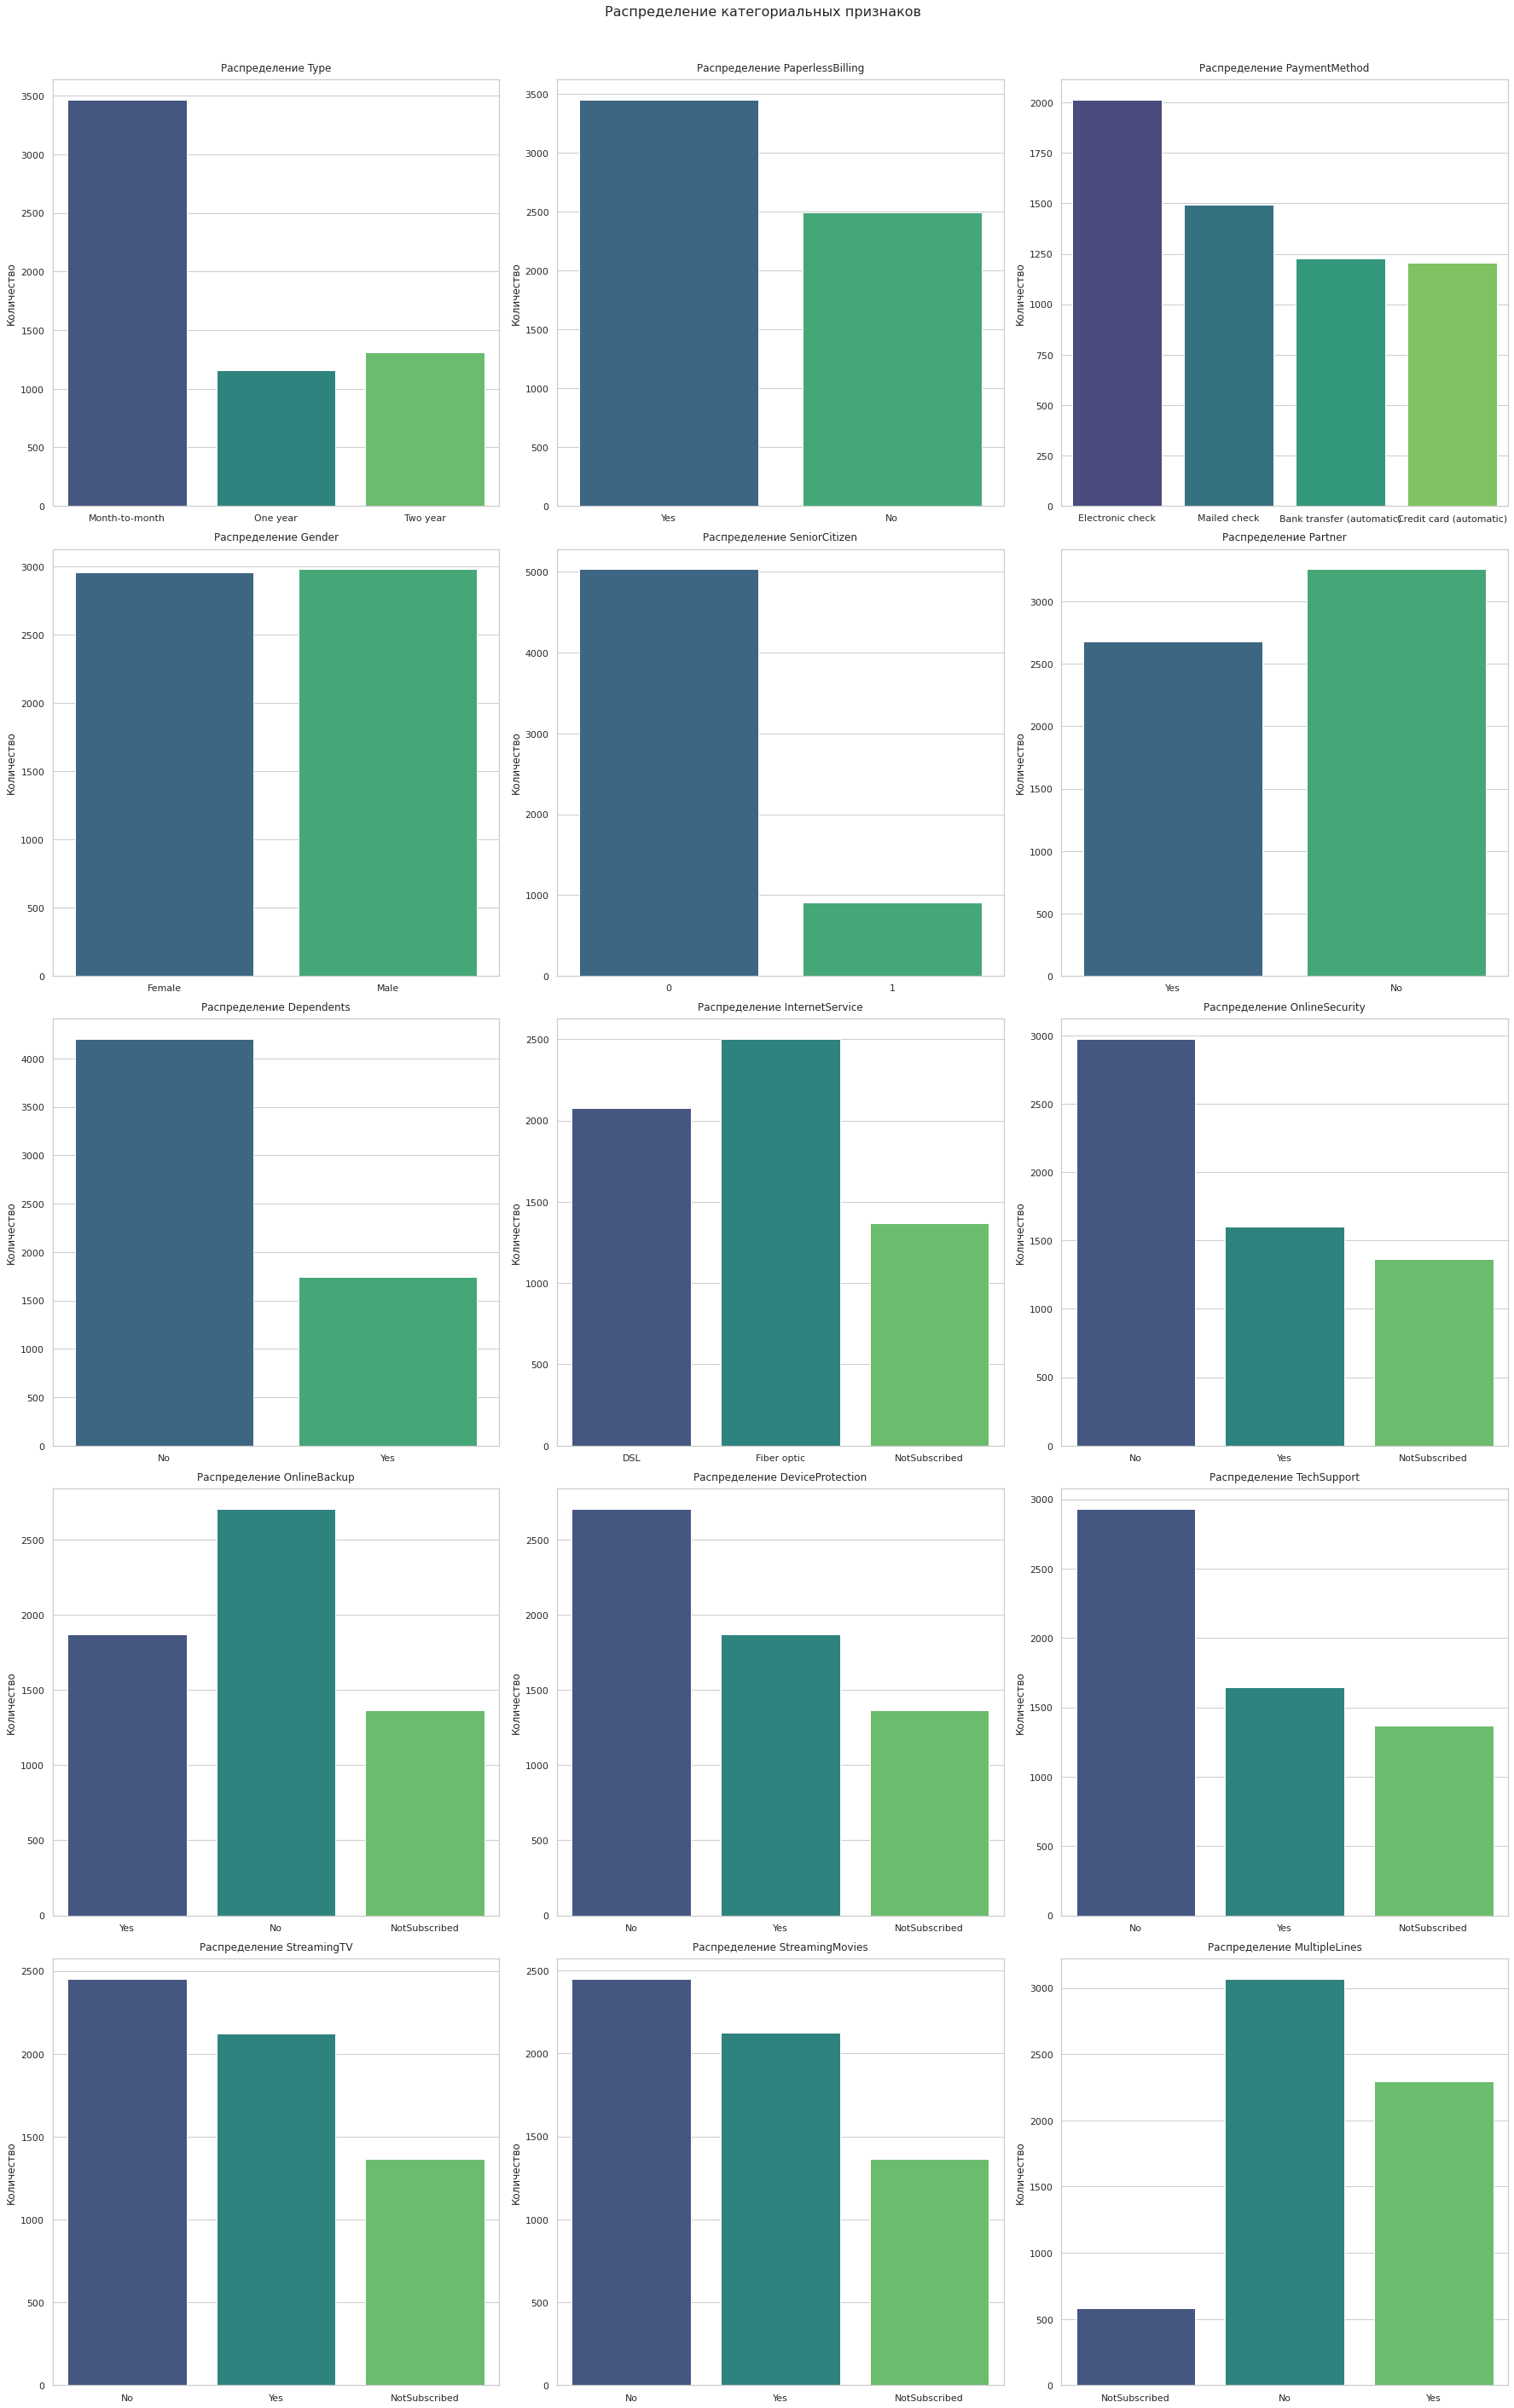

None

In [27]:
display(print('Целевой признак = 1, клиент отказался от услуг'))
display(plot_features_cat(res_df[res_df['refusal_service']==1],cat_col))
display(print('Целевой признак = 0, клиент продолжает пользоваться услугами'))
display(plot_features_cat(res_df[res_df['refusal_service']==0],cat_col))

**Итого:**
* Пользователи, которые используют помесячную оплату чаще всех отказываются от услуг
* Пользователи, которые хотят оплатить методом "электронный чек", чаще всего отказываются от услуг, скорее всего проблема с самим процессом оплаты
* Признак пола пользователя не влияет на отказы
* Пользователи-пенсионеры довольно часто уходят, может быть к ним нужен особый подход поддержки
* Пользователи, у которых есть дети, чаще всего остаются
* Пользователь, который не пользуется интернетом, вероятнее останется клиентом

Теперь рассмотрим колличественные признаки

Целевой признак = 1, клиент отказался от услуг


None

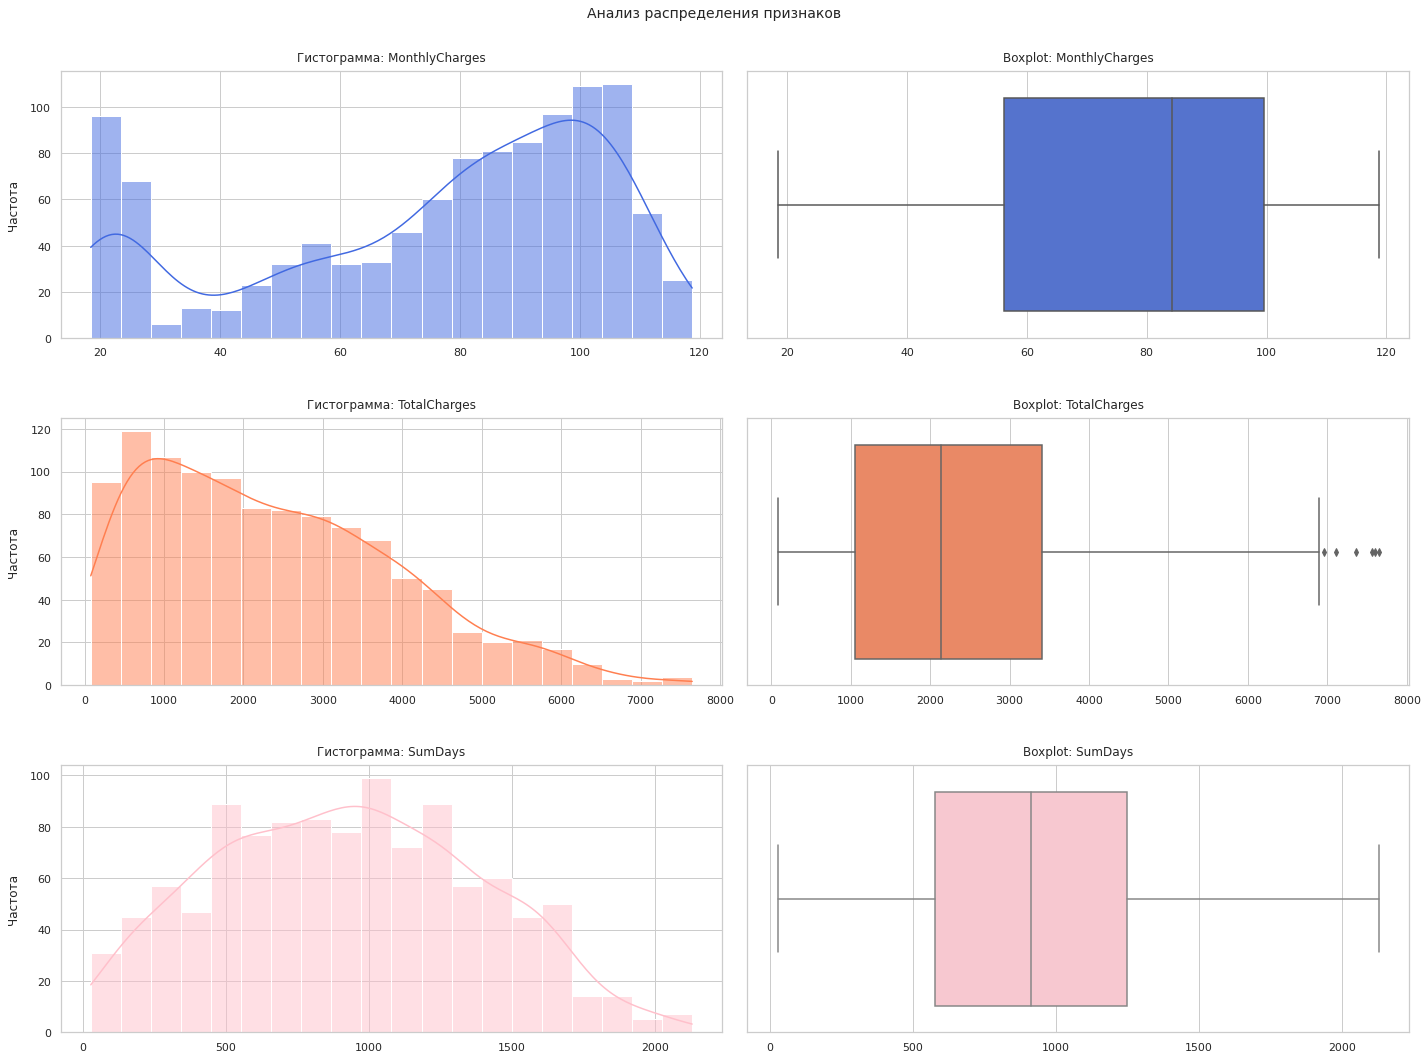

None

,MonthlyCharges,TotalCharges,refusal_service,SumDays,SeniorCitizen
count,1101.000000,1101.000000,1101.0,1101.000000,1101.000000
mean,75.546004,2371.377275,1.0,924.863760,0.210718
std,29.116213,1581.862275,0.0,458.771309,0.408003
min,18.400000,77.840000,1.0,28.000000,0.000000
25%,56.150000,1048.050000,1.0,577.000000,0.000000
50%,84.200000,2139.030000,1.0,915.000000,0.000000
75%,99.500000,3404.910000,1.0,1249.000000,0.000000
max,118.750000,7649.760000,1.0,2129.000000,1.000000


Целевой признак = 0, клиент продолжает пользоваться услугами


None

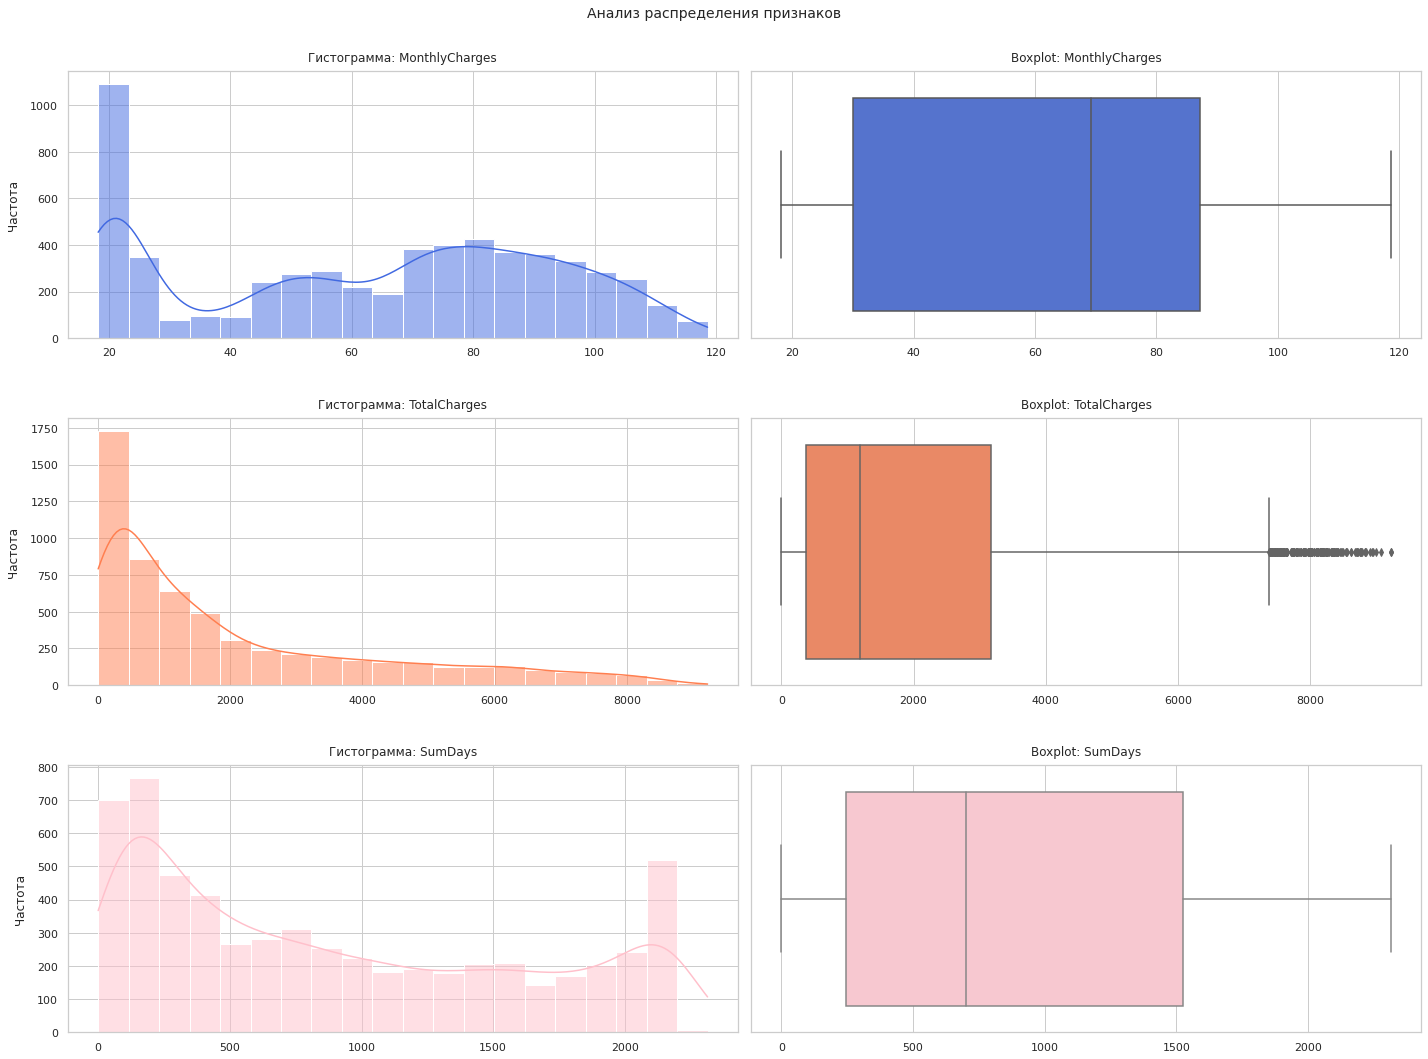

None

,MonthlyCharges,TotalCharges,refusal_service,SumDays,SeniorCitizen
count,5942.000000,5942.000000,5942.0,5942.000000,5942.000000
mean,62.763455,2067.866420,0.0,893.681084,0.153147
std,29.844462,2193.898483,0.0,716.958551,0.360160
min,18.250000,0.000000,0.0,0.000000,0.000000
25%,30.062500,374.352500,0.0,245.000000,0.000000
50%,69.200000,1192.800000,0.0,702.000000,0.000000
75%,87.237500,3173.837500,0.0,1523.000000,0.000000
max,118.600000,9221.380000,0.0,2314.000000,1.000000


In [28]:
display(print('Целевой признак = 1, клиент отказался от услуг'))
display(plot_features_num(res_df[res_df['refusal_service']==1],kol_col))
display(res_df[res_df['refusal_service']==1].describe())
display(print('Целевой признак = 0, клиент продолжает пользоваться услугами'))
display(plot_features_num(res_df[res_df['refusal_service']==0],kol_col))
display(res_df[res_df['refusal_service']==0].describe())

**Итог:**
* Чем дольше клиент пользуется услугами, тем меньше шанс, того, что клиент откажется
* Цена - главный признак оттока, ушедшие клиенты платили ежемесячно больше, чем те, кто не отказывался от услуг
* Несмотря на более высокие общие затраты, клиенты ушли, скорее всего связано с общим долгосрочным недовольством клиентов


### Корреляционный анализ данных

Просмотрим корреляцию между всеми признаками

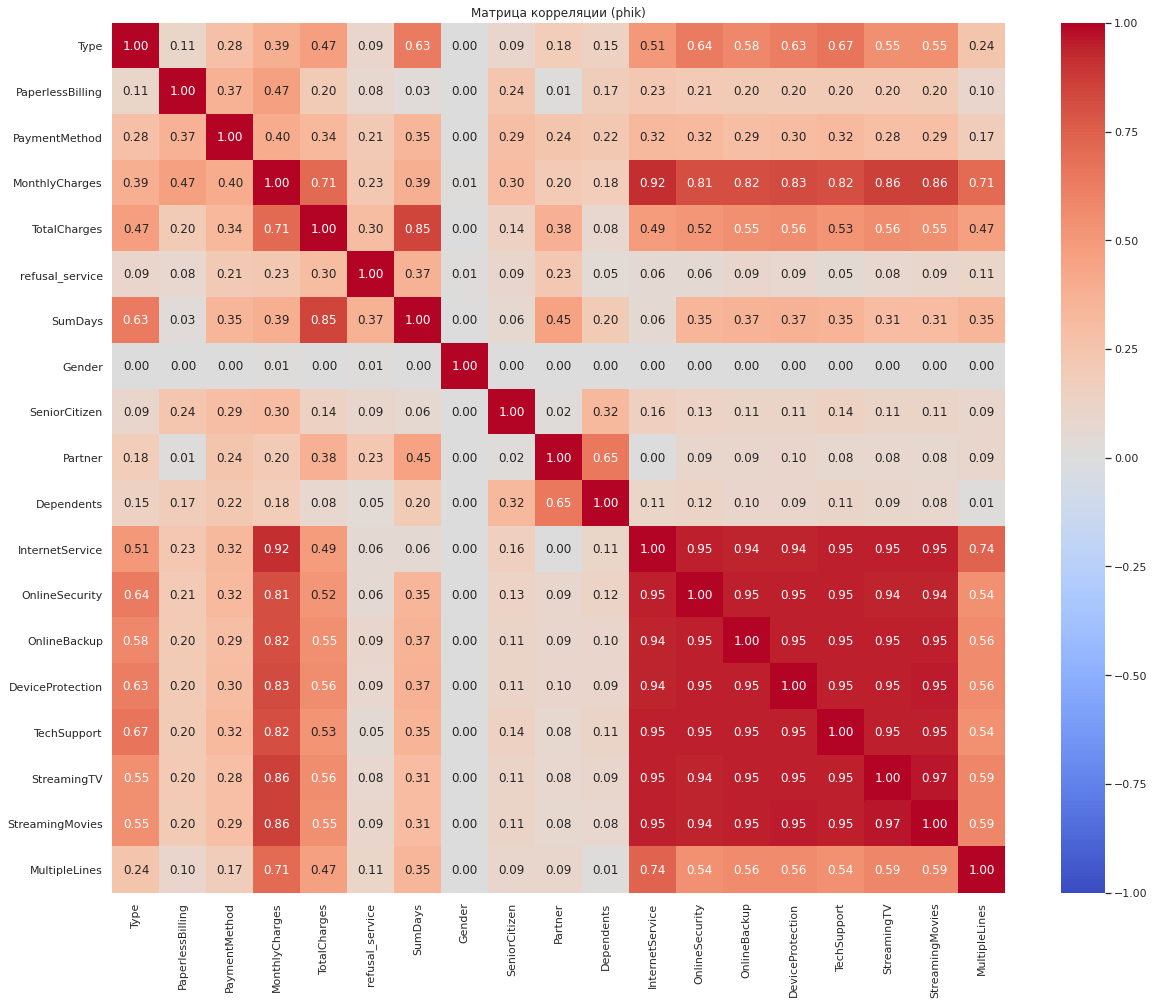

In [29]:
interval_cols = ['MonthlyCharges', 'TotalCharges', 'SumDays']
cols_for_corr = res_df.select_dtypes(include=['number', 'category', 'object']).columns
corr_matrix = res_df[cols_for_corr].phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляции (phik)')
plt.show()

**Итого:**
* Сильная мультиколлинеарность:
    * TotalCharges и SumDays - 0.85 (Чем больше клиент пользуется услугами, тем больше общий чек)
    * InternetService и MonthlyCharges - 0.92 (Скорее всего связано с тем, что большинство клиентов, которые оплачивают помесячно, имеют только интернет в подключенных услугах)
    * Группа интернет-услуг (OnlineSecurity, StreamingTV и др.) между собой 0.94–0.97 (Скорее всего, связь настолько сильная, потому что данные услуги могут автоматически входить стоимость пакета internet_service, либо большинству клиентов просто выгодны данные услуги
* Принимаем решения:
    * Столбец TotalCharges удалить, по сути это составной признак и на качество модели сильно не повлияет
    * "Пару признаков InternetService и MonthlyChanges не будем удалять или изменять, значимые признаки, которые могут повлиять на качество модели, но так как мы используем в проекте линейные модели, применим после регуляризацию, чтобы уменьшить эффект мультиколлинеарности на модели"*
    * Признаки доп. услуг объединим в один признак - CountExtraServices (количество доп. услуг). Это поможет нам разобраться с мультиколлинеарностью и при этом сохранит информацию: клиенты с большим количеством услуг могут быть более лояльны (или наоборот)

In [30]:
internet_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
#создаем новый признак
res_df['CountExtraServices'] = 0
for service in internet_services:
    res_df['CountExtraServices'] += (res_df[service] == 'Yes').astype(int)
#удаляем оригинальные столбцы с услугами
res_df = res_df.drop(columns=internet_services)
del res_df['TotalCharges']
res_df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,refusal_service,SumDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,MultipleLines,CountExtraServices
CustomerID,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,0,31,Female,0,Yes,No,DSL,NotSubscribed,1
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,0,1036,Male,0,No,No,DSL,No,2
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,0,123,Male,0,No,No,DSL,No,2
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,0,1371,Male,0,No,No,DSL,NotSubscribed,3
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,0,153,Female,0,No,No,Fiber optic,No,0


Снова просмотрим на корреляцию

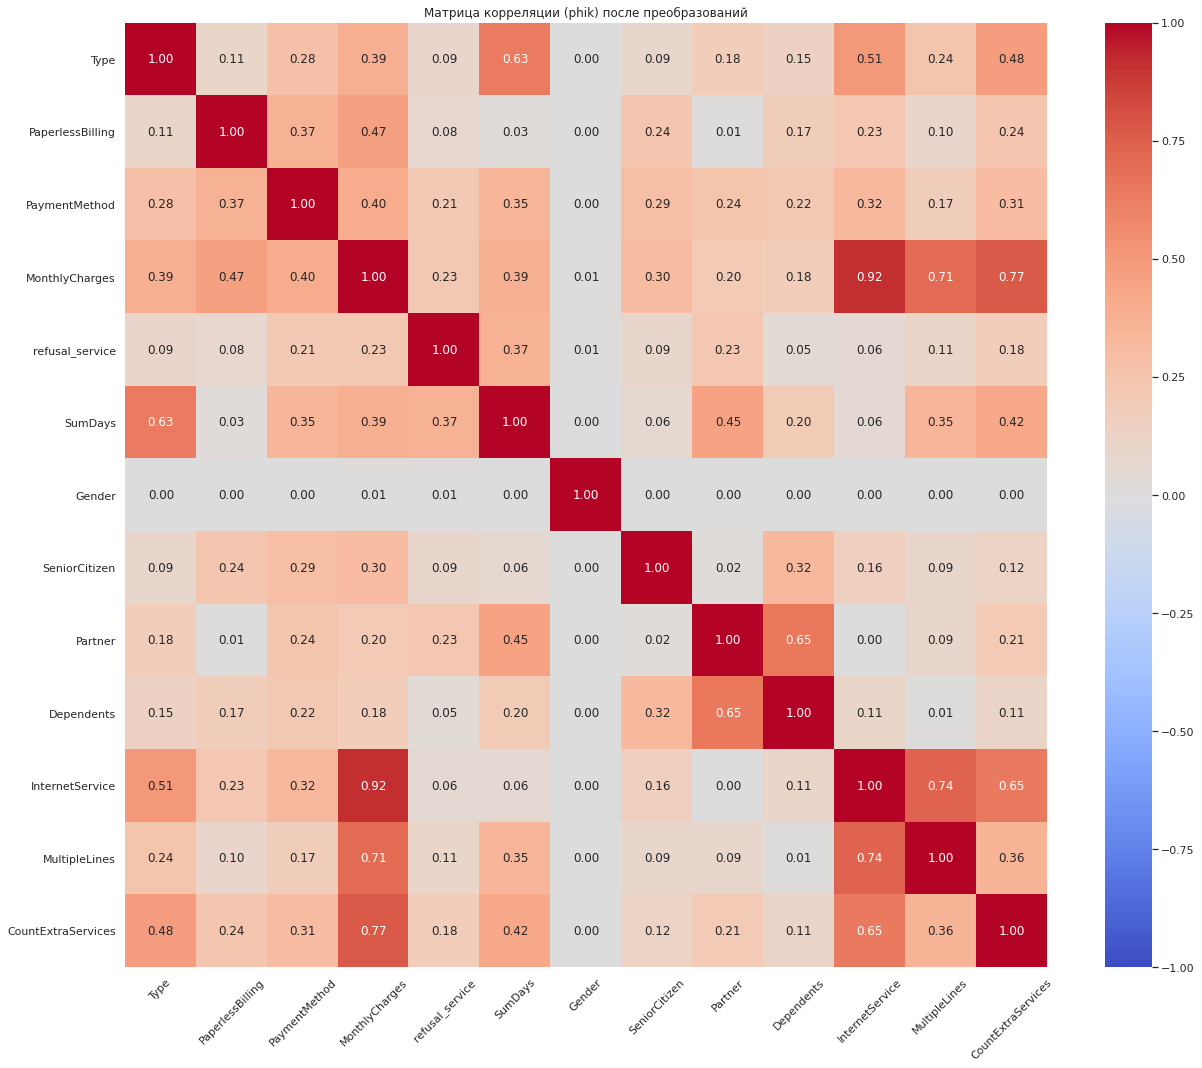

In [31]:
interval_cols = ['MonthlyCharges', 'SumDays', 'CountExtraServices']
cols_for_corr = res_df.select_dtypes(include=['number', 'category', 'object']).columns

# Строим новую матрицу корреляций
corr_matrix = res_df[cols_for_corr].phik_matrix(interval_cols=interval_cols)

# Визуализация
plt.figure(figsize=(18, 15))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1,
)
plt.title('Матрица корреляции (phik) после преобразований')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Отлично, с мултиколлинеарностью признаков,кроме InternetService и MonthlyCharges, справились

### Вывод по анализу данных:

* Демография клиентов
    * Основная аудитория — мужчины без супругов и детей, пользующиеся помесячной оплатой и электронными чеками
    * Пенсионеры демонстрируют высокий уровень оттока, что указывает на необходимость адаптации сервиса под их потребности (например, упрощённый интерфейс или специальные тарифы)
* Услуги и платежи
    * Наибольшей популярностью пользуется оптоволоконный интернет, тогда как дополнительные услуги (Online Security, Tech Support и др.) почти не востребованы
    * Цена — критический фактор оттока: клиенты с высокими ежемесячными платежами (MonthlyCharges > 85) уходят чаще, особенно если не видят соответствующей ценности
    * Бимодальность распределения платежей (пики на 20 и 85) говорит о поляризации клиентов:
        * Бюджетные пользователи (низкие тарифы) более лояльны
        * Платящие много — склонны к отказу из-за несоответствия цены и качества
* Поведенческие паттерны
    * Электронные чеки связаны с повышенным оттоком, что может указывать на проблемы в процессе оплаты (например, сложность отмены подписки)
    * Долгосрочные клиенты (высокие TotalCharges) реже отказываются от услуг, но их уход связан с накопленным недовольством (например, усталость от сервиса)
    * Клиенты без интернета или с минимальными тарифами демонстрируют высокую лояльность

## **Подготовка данных**

Стоит сказать, что признаки begindate и enddate стоит убрать, так как они могут отрицательно повлиять на метрики модели

In [32]:
del res_df['BeginDate'],res_df['EndDate']
res_df.head(1)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,refusal_service,SumDays,Gender,SeniorCitizen,Partner,Dependents,InternetService,MultipleLines,CountExtraServices
CustomerID,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,0,31,Female,0,Yes,No,DSL,NotSubscribed,1


### Разделим данные, закодируем, масштабируем

Разделим данные

In [33]:
target = res_df['refusal_service']
features = res_df.drop(columns=['refusal_service'])
numerical_cols = ['MonthlyCharges', 'SeniorCitizen', 'SumDays','CountExtraServices']
categorical_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE
)

Создадим трансформер для данных модели LogisticRegression 

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'), categorical_cols)
    ],
    remainder='drop')

Применим трансформер для наших данных

In [35]:
X_train_linear = preprocessor.fit_transform(features_train)
X_test_linear = preprocessor.transform(features_test)
#сохраняем имена признаков после преобразования
linear_feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
tree_feature_names = features_train.columns.tolist() 

Теперь подготовим данные для RandomForestClassifier

In [36]:
X_train_tree = features_train.copy()
X_test_tree = features_test.copy()
#OrdinalEncoder
ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

#применим только к категориальным признакам
X_train_tree[categorical_cols] = ordinal_encoder.fit_transform(X_train_tree[categorical_cols])
X_test_tree[categorical_cols] = ordinal_encoder.transform(X_test_tree[categorical_cols])

#проверяем размерности
print("X_train_tree:", X_train_tree.shape)
print("target_train:", target_train.shape)

X_train_tree: (5282, 12)
target_train: (5282,)


Теперь подготовим данные для CatBoost,кодирование для нее не обязательно, поэтому преобразуем типы

In [37]:
catboost_train = features_train.copy()
for col in categorical_cols:
    catboost_train[col] = catboost_train[col].astype('category')
    
catboost_test = features_test.copy()
for col in categorical_cols:
    catboost_test[col] = catboost_test[col].astype('category')

Проверим размерности

In [38]:
display(X_train_linear.shape)
display(X_test_linear.shape)
display(X_train_tree.shape)
display(X_test_tree.shape)

(5282, 17)

(1761, 17)

(5282, 12)

(1761, 12)

### Проверим дисбаланс классов

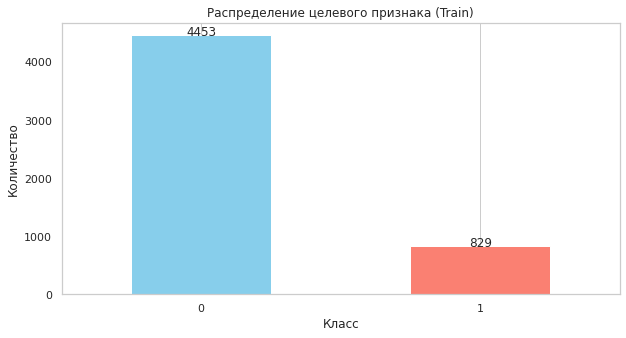

Соотношение классов (1/0): 0.19
сильный дисбаланс классов (класс 1 в меньшинстве)


In [39]:
#подсчет количества значений и соотношения классов
class_counts = target_train.value_counts()
ratio = class_counts[1] / class_counts[0] 
ax = class_counts.plot(
    kind='bar',
    figsize=(10, 5),
    color=['skyblue', 'salmon'], 
    title='Распределение целевого признака (Train)',
    rot=0  
)
for i, count in enumerate(class_counts):
    ax.text(i, count + 5, str(count), ha='center', fontsize=12)
ax.set(xlabel='Класс', ylabel='Количество')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
print(f"Соотношение классов (1/0): {ratio:.2f}")
if ratio < 0.5:
    print("сильный дисбаланс классов (класс 1 в меньшинстве)")
elif ratio > 2:
    print("класс 1 преобладает над классом 0")
else:
    print("Дисбаланс умеренный")

Присутствует дисбаланс классов, но,так как целевая метрика AUC-ROC, делать ничего не будем, так как данная метрика нечувствительна к дисбалансу

### Вывод по подготовке данных:

* Данные готовы к обучению моделей
* Удалены признаки даты, для корректности модели
* Данные закодированы и масштабированы
* Присутствует дисбаланс значений целевого признака, учтем в обучении моделей

## **Обучение моделей**

Перед обучением моделей стоит отметить, что:
* Используем кросс-валидацию, а не валидационную выборку
* Только интерпретируемые модели(RandomForestClassifier,CatBoost,LogisticRegression)
* Основная метрика - AUC-ROC
* Пороговое значение основной метрики - >= 0.85
* Дополнительно считаем и интерпретируем метрику Accuracy
* Подбираем гиперпараметры для каждой из моделей


Напишем функцию для вычисления auc-roc и построения графика

In [40]:
def plot_roc_curve(target_test, predictions, model_name=''):
    # Вычисляем ROC-AUC и accuracy
    auc_score = roc_auc_score(target_test, predictions)
    print(f'ROC-AUC score: {auc_score:.4f}')
    accuracy = accuracy_score(target_test, (predictions >= 0.5).astype(int))
    print(f'Accuracy: {accuracy:.4f}', end=' - ')
    
    # Вычисляем ROC-кривую
    fpr, tpr, _ = roc_curve(target_test, predictions)
    
    # Строим график
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC-кривая {model_name}', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    plt.show()

### Обучение RandomForestClassifier

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
ROC-AUC score: 0.8255
Accuracy: 0.8633 - 

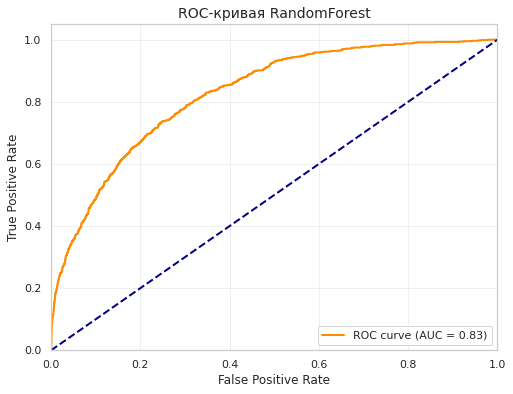

In [41]:
#гиперпараметры для подбора
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
# RandomForestClassifier
rf_model = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_jobs=-1
)

#GridSearchCV
rf_cv = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)
rf_cv.fit(X_train_tree, target_train)
best_rf = rf_cv.best_estimator_
print(f"\nЛучшие параметры: {rf_cv.best_params_}")
#Оценка модели через кроссвалидацию
cv_probs = cross_val_predict(
    best_rf, 
    X_train_tree, 
    target_train, 
    cv=5, 
    method='predict_proba',
    n_jobs=-1
)[:, 1]
plot_roc_curve(target_train, cv_probs, 'RandomForest')

### Обучение LogisticRegression

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Лучшие параметры: {'C': 1, 'max_iter': 1000}
ROC-AUC score: 0.7524
Accuracy: 0.8620 - 

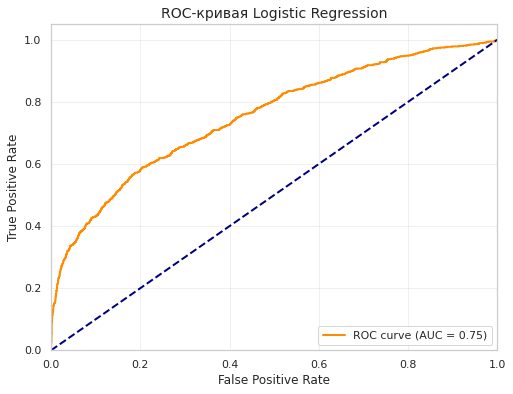

In [42]:
#параметры для GridSearchCV
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100, 1000],
    'max_iter': [1000],
}

#модель логистической регрессии
lr_model = LogisticRegression(
    solver='lbfgs',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

#GridSearchCV
lr_cv = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

lr_cv.fit(X_train_linear, target_train)
best_lr = lr_cv.best_estimator_
print(f"\nЛучшие параметры: {lr_cv.best_params_}")
#оценка модели через кроссвалидацию
lr_cv_probs = cross_val_predict(
    best_lr,
    X_train_linear,
    target_train,
    cv=5,
    method='predict_proba',
    n_jobs=-1
)[:, 1]
plot_roc_curve(target_train, lr_cv_probs, 'Logistic Regression')

### Обучение CatBoostClassifier

Fitting 5 folds for each of 120 candidates, totalling 600 fits

Лучшие параметры: {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.3}
ROC-AUC score: 0.8663
Accuracy: 0.8800 - 

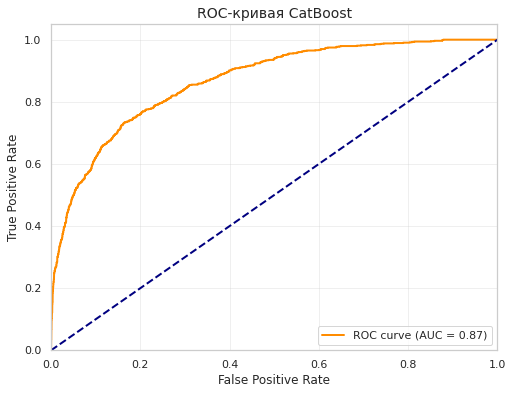

In [43]:
#параметры для GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'iterations': [50, 100],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'depth': [4, 6, 8],
}

#CatBoost
cat_model = CatBoostClassifier(
    random_state=RANDOM_STATE,
    verbose=0,
    early_stopping_rounds=20,
    cat_features=categorical_cols  # Указываем категориальные признаки
)
#GridSearchCV
cat_cv = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
cat_cv.fit(catboost_train, target_train)
best_cat = cat_cv.best_estimator_
print(f"\nЛучшие параметры: {cat_cv.best_params_}")
#оценка модели через кроссвалидацию
cv_probs = cross_val_predict(
    best_cat,
    catboost_train,
    target_train,
    cv=5,
    method='predict_proba',
    n_jobs=-1
)[:, 1]
plot_roc_curve(target_train, cv_probs, 'CatBoost')

### Вывод по обучению моделей

Вывод:
* Модель RandomForestClassifier
    * Лучшие параметры:
        * max_depth: 10
        * min_samples_leaf: 1
        * min_samples_split: 5
        * n_estimators: 200
    * **ROC-AUC score: 0.8255**
    * Accuracy: 0.8633 
* Модель LogisticRegression
    * Лучшие параметры:
        * C: 0.1
        * max_iter: 1000
    * **ROC-AUC score: 0.7524**
    * Accuracy: 0.8620 
* Модель CatBoostClassifier
    * Лучшие параметры:
        * depth: 6
        * iterations: 100,
        * l2_leaf_reg: 1
        * learning_rate: 0.3
    * **ROC-AUC score: 0.8663**
    * Accuracy: 0.88

Так как наша целевая метрика roc-auc, лучшее значение показала модель CatBoost - 0.8663 , выберем ее, но при этом стоит учитывать что модель RandomForestClassifier, тоже показала хорошие результаты

## **Исследование лучшей модели**

### Посмотрим на метрики на тестовых данных


Оценка CatBoost на тестовых данных:
ROC-AUC score: 0.8833
Accuracy: 0.8836 - 

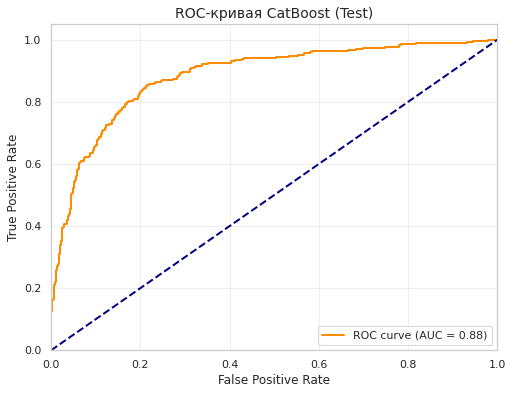

In [44]:
#инициализируем модель с лучшими параметрами
best_cat = CatBoostClassifier(
    random_state=RANDOM_STATE,
    verbose=0,
    early_stopping_rounds=20,
    cat_features=categorical_cols,
    depth=6,
    iterations=100,
    l2_leaf_reg=1,
    learning_rate=0.3
)
# Обучаем и тестируем на всех тренировочных данных
best_cat.fit(catboost_train, target_train)
test_probs = best_cat.predict_proba(catboost_test)[:, 1]
test_preds = best_cat.predict(catboost_test)
print("\nОценка CatBoost на тестовых данных:")
plot_roc_curve(target_test, test_probs, 'CatBoost (Test)')

### Проверка модели на адекватность

In [45]:
dummy = DummyClassifier(strategy='stratified', random_state=RANDOM_STATE)
dummy.fit(catboost_train, target_train)
dummy_probs = dummy.predict_proba(catboost_test)[:, 1]
dummy_preds = dummy.predict(catboost_test)

# 3. Сравнение метрик
catboost_accuracy = accuracy_score(target_test, test_preds)
dummy_accuracy = accuracy_score(target_test, dummy_preds)

catboost_roc_auc = roc_auc_score(target_test, test_probs)
dummy_roc_auc = roc_auc_score(target_test, dummy_probs)
print("Сравнение")
print(f"ROC-AUC (CatBoost) - {catboost_roc_auc.round(2)}, Accuracy(CatBoost) - {catboost_accuracy:.2f}")
print(f"ROC-AUC (Dummy) - {dummy_roc_auc.round(2)}, Accuracy(Dummy) - {dummy_accuracy:.2f}")

Сравнение
ROC-AUC (CatBoost) - 0.88, Accuracy(CatBoost) - 0.88
ROC-AUC (Dummy) - 0.5, Accuracy(Dummy) - 0.74


Как видим, наши действия имели смысл, модель лучше константы по ROC-AUC на 0,38, а accuracy на 0,14

### Просмотрим Accuracy

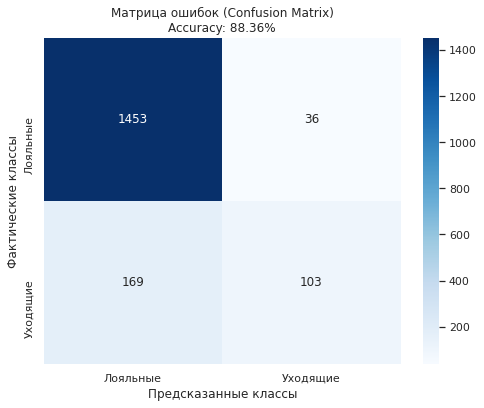

1.Общая точность прогнозов: 88.4%
 Модель верно предсказывает поведение 1556 из 1761 клиентов

2.Анализ ошибок:
 Ложные тревоги (FP): 36 клиентов - лояльные, но помечены как уходящие
   Риск неоправданных маркетинговых затрат
 Пропущенные уходы (FN): 169 клиентов - уйдут, но модель их не нашла
  → Потеря потенциального дохода
 Точность прогноза ухода: 74.1% из тех, кого модель отметила


In [46]:
accuracy = accuracy_score(target_test, test_preds)
conf_matrix = confusion_matrix(target_test, test_preds)
tn, fp, fn, tp = conf_matrix.ravel()
total_clients = len(target_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['Лояльные', 'Уходящие'],
            yticklabels=['Лояльные', 'Уходящие'])
plt.title('Матрица ошибок (Confusion Matrix)\nAccuracy: {:.2f}%'.format(accuracy*100))
plt.xlabel('Предсказанные классы')
plt.ylabel('Фактические классы')
plt.show()
# Интерпретируем accuracy
print(f"1.Общая точность прогнозов: {accuracy:.1%}")
print(f" Модель верно предсказывает поведение {int(accuracy*total_clients)} из {total_clients} клиентов")

print("\n2.Анализ ошибок:")
print(f" Ложные тревоги (FP): {fp} клиентов - лояльные, но помечены как уходящие")
print(f"   Риск неоправданных маркетинговых затрат")
print(f" Пропущенные уходы (FN): {fn} клиентов - уйдут, но модель их не нашла")
print(f"  → Потеря потенциального дохода")
print(f" Точность прогноза ухода: {tp/(tp+fp):.1%} из тех, кого модель отметила")

Отлично, данная модель нам подходит по условию, метрика roc_auc составила 0.8905, просмотрим важности признаков 

### Определение важности признаков

Создадим новый датафрейм для важности признаков

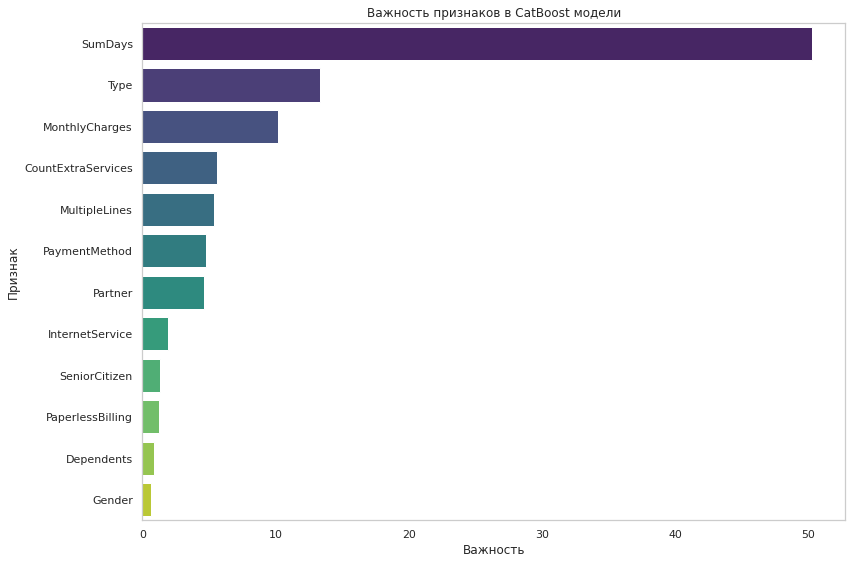


Топ-10 самых важных признаков:
           Feature  Importance
           SumDays   50.239357
              Type   13.295464
    MonthlyCharges   10.175379
CountExtraServices    5.561376
     MultipleLines    5.334240


In [47]:
#получаем важность признаков
feature_importance = best_cat.get_feature_importance()
importance_df = pd.DataFrame({
    'Feature': catboost_train.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)
#график
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Важность признаков в CatBoost модели')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
print("\nТоп-10 самых важных признаков:")
print(importance_df.head(5).to_string(index=False))

### Вывод по исследованию лучшей модели

* Лучшей моделью (на тестовых данных) оказалась CatBoost с параметрами: depth=6,iterations=100,l2_leaf_reg=1,learning_rate=0.3 
* Качество модели по метрике ROC-AUC - 0.8833, а по accuracy - 0.8836, данные значения соответствуют условиям
* Наиболее важными признаками оказались SumDays,MonthlyCharges,Type то есть сколько клиент пользуется услугами и сколько он платит в месяц за них и какой тип оплаты(ежемесячно и раз в год/два) выбрал клиент.

## Итоговый вывод

В ходе выполнения проекта, были проделаны все шаги в соответствии с планом, а именно:
* Загрузили и выполнили первичный осмотр данных:
    * **Датафрейм contract**
        * Датафрейм состоит из 7043 строк и 8 столбцов 
        * Пропуски в данных отсутствуют
        * Явные дубликаты в данных отсутствуют
        * Столбцы BeginDate и EndDate стоит перевести в формат даты
        * Столбец EndDate, имеет значения No, данное значение является признаком того, что клиент продолжает пользоваться услугами, в условии задачи при этом отмечено, что Информация о договорах актуальна на 1 февраля 2020 года, поэтому после выделения целевого признака надо будет заменить No на 01.02.2020 в EndDate
        * Столбец customerID необходимо переименовать на CustomerID
        * В столбец TotalCharges значения необходимо перевести в числовой формат
    
    * **Датафрейм personal**
        * Состоит из 7043 строк и 5 столбцов
        * Пропуски в данных отсутствуют 
        * Явные дубликаты отсутствуют
        * Типы данных соответствуют
        * Стоит поменять название столбцов customerID -> CustomerID, gender -> Gender
    
    * **Датафрейм internet**
        * Состоит из 5517 строк и 8 столбцов 
        * Пропуски в данных отсутствуют 
        * Явные дубликаты отсутствуют
        * Типы данных соответствуют
        * Стоит поменять название столбца customerID -> CustomerID
    
    * **Датафрейм phone**
        * Состоит из 6361 строк и 2 столбцов 
        * Пропуски отсутствуют
        * Явные дубликаты отсутствуют
        * Типы данных соответсвуют
        * Столбец customerID стоит преобразовать в СustomerID
* Провели предобработку данных:
    * Изменены названия столбцов: customerID -> CustomerID,gender->Gender
    * Создан целевой признак - refusal_service
    * Изменены типы данных для таблицы contract: BeginDate -> date,EndDate -> date
    * Создали итоговую таблицу для последующего анализа данных
* Провели анализ данных:
    * Демография клиентов
        * Основная аудитория — мужчины без супругов и детей, пользующиеся помесячной оплатой и электронными чеками
        * Пенсионеры демонстрируют высокий уровень оттока, что указывает на необходимость адаптации сервиса под их потребности (например, упрощённый интерфейс или специальные тарифы)
    * Услуги и платежи
        * Наибольшей популярностью пользуется оптоволоконный интернет, тогда как дополнительные услуги (Online Security, Tech Support и др.) почти не востребованы
        * Цена — критический фактор оттока: клиенты с высокими ежемесячными платежами (MonthlyCharges > 85) уходят чаще, особенно если не видят соответствующей ценности
        * Бимодальность распределения платежей (пики на 20 и 85) говорит о поляризации клиентов:
        * Бюджетные пользователи (низкие тарифы) более лояльны
        * Платящие много — склонны к отказу из-за несоответствия цены и качества
    * Поведенческие паттерны
        * Электронные чеки связаны с повышенным оттоком, что может указывать на проблемы в процессе оплаты (например, сложность отмены подписки)
        * Долгосрочные клиенты (высокие TotalCharges) реже отказываются от услуг, но их уход связан с накопленным недовольством (например, усталость от сервиса)
        * Клиенты без интернета или с минимальными тарифами демонстрируют высокую лояльность
* Подготовили данные, перед обучением моделей:
    * Данные готовы к обучению моделей
    * Удалены признаки даты, для корректности модели
    * Данные закодированы и масштабированы
    * Выявили дисбаланс значений целевого признака
* Обучили модели:
    * Модель RandomForestClassifier
        * Лучшие параметры:
            * max_depth: 10
            * min_samples_leaf: 1
            * min_samples_split: 5
            * n_estimators: 200
        * **ROC-AUC score: 0.8255**
        * Accuracy: 0.8633 
    * Модель LogisticRegression
        * Лучшие параметры:
            * C: 0.1
            * max_iter: 1000
        * **ROC-AUC score:  0.7524**
        * Accuracy: 0.8620  
    * Модель CatBoostClassifier
        * Лучшие параметры:
            * depth: 6
            * iterations: 100,
            * l2_leaf_reg: 1
            * learning_rate: 0.3
        * **ROC-AUC score: 0.8663**
        * Accuracy: 0.88
* Исследовали лучшую модель:
    * Лучшей моделью (на тестовых данных) оказалась CatBoost с параметрами: depth=6,iterations=100,l2_leaf_reg=1,learning_rate=0.3
    * Качество модели по метрике ROC-AUC - 0.8833, а по accuracy - 0.8836,  данные значения соответствуют условиям
    * Наиболее важными признаками оказались SumDays,MonthlyCharges,Type то есть сколько клиент пользуется услугами и сколько он платит в месяц за них и какой тип оплаты(ежемесячно и раз в год/два) выбрал клиент.
* Стоит добавить, что необходимо сфокусироваться на двух ключевых группах риска:
    * Клиенты с высокими MonthlyCharges 
    * Долгосрочные пользователи (SumDays >700 дней)
* Стоит использовать:
    * Персональные предложения за 1 месяц до прогнозируемого оттока
    * Специальные условия для "пограничных" клиентов (определяемых моделью)
